**Unsupervised Learning**

*Unlabelled data to be labelled*

In [1]:
import numpy as np
import pandas as pd

n1 = np.random.randint(10,20 , (6,2))
n2 = np.random.randint(30,50 , (6,2))
n3 = np.random.randint(60,80 , (6,2))

X = np.vstack((n1,n2,n3))
#Shuffle values in X
np.random.shuffle(X)


df = pd.DataFrame(X , columns = ['Income','Expenses'])
df

,Income,Expenses
0,11,18
1,17,10
2,31,44
3,40,31
4,61,68
5,78,78
6,40,41
7,62,69
8,42,45
9,70,65


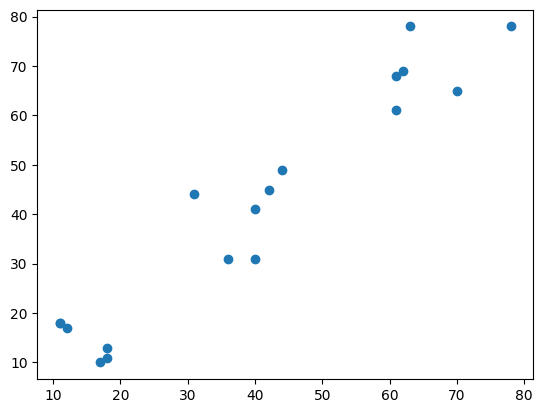

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1])
plt.show()

**Define centeroids**

In [4]:
cent1 = np.random.randint(20,70 , (2,))
cent2 = np.random.randint(20,70 , (2,))
cent3 = np.random.randint(20,70 , (2,))

print(cent1)
print()
print(cent2)
print()
print(cent3)

[50 50]

[56 49]

[44 64]


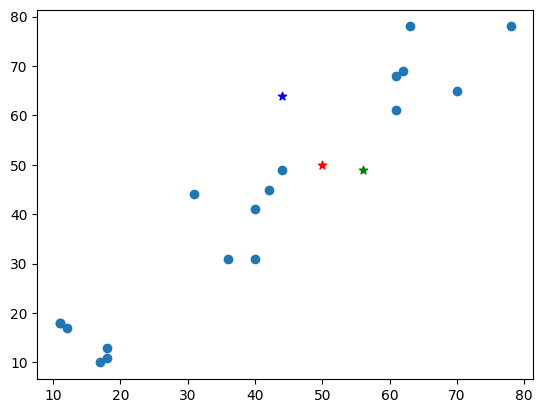

In [5]:
plt.scatter(X[:,0],X[:,1])

plt.scatter(cent1[0],cent1[1],color = 'r',marker='*')
plt.scatter(cent2[0],cent2[1],color = 'g',marker='*')
plt.scatter(cent3[0],cent3[1],color = 'b',marker='*')

plt.show()

In [6]:
#Distance from 1st centeroid
df['r'] = ((X[:,0] - cent1[0])**2 + (X[:,1] - cent1[1])**2)**0.5

#Distance from 2nd centeroid
df['g'] = ((X[:,0] - cent2[0])**2 + (X[:,1] - cent2[1])**2)**0.5

#Distance from 3rd centeroid
df['b'] = ((X[:,0] - cent3[0])**2 + (X[:,1] - cent3[1])**2)**0.5

df

,Income,Expenses,r,g,b
0,11,18,50.447993,54.644304,56.612719
1,17,10,51.855569,55.154329,60.373835
2,31,44,19.924859,25.495098,23.853721
3,40,31,21.470911,24.083189,33.241540
4,61,68,21.095023,19.646883,17.464249
5,78,78,39.597980,36.400549,36.769553
6,40,41,13.453624,17.888544,23.345235
7,62,69,22.472205,20.880613,18.681542
8,42,45,9.433981,14.560220,19.104973
9,70,65,25.000000,21.260292,26.019224


In [7]:
df['Label'] = df.loc[:,'r':'b'].idxmin(axis=1)

In [8]:
df

,Income,Expenses,r,g,b,Label
0,11,18,50.447993,54.644304,56.612719,r
1,17,10,51.855569,55.154329,60.373835,r
2,31,44,19.924859,25.495098,23.853721,r
3,40,31,21.470911,24.083189,33.241540,r
4,61,68,21.095023,19.646883,17.464249,b
5,78,78,39.597980,36.400549,36.769553,g
6,40,41,13.453624,17.888544,23.345235,r
7,62,69,22.472205,20.880613,18.681542,b
8,42,45,9.433981,14.560220,19.104973,r
9,70,65,25.000000,21.260292,26.019224,g


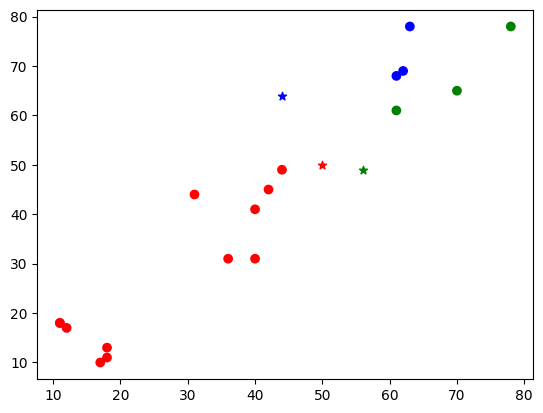

In [9]:
plt.scatter(df['Income'],df['Expenses'],c=df['Label'])

plt.scatter(cent1[0],cent1[1],color = 'r',marker='*')
plt.scatter(cent2[0],cent2[1],color = 'g',marker='*')
plt.scatter(cent3[0],cent3[1],color = 'b',marker='*')

plt.show()

In [10]:
df[df['Label'] == 'g']

,Income,Expenses,r,g,b,Label
5,78,78,39.597980,36.400549,36.769553,g
9,70,65,25.000000,21.260292,26.019224,g
10,61,61,15.556349,13.000000,17.262677,g


In [11]:
#Update centeroids values
#mean values of each cluster formed

cent1 = list(df[df['Label'] == 'r'][['Income','Expenses']].mean())
cent2 = list(df[df['Label'] == 'g'][['Income','Expenses']].mean())
cent3 = list(df[df['Label'] == 'b'][['Income','Expenses']].mean())

print(cent1 , cent2 , cent3)

[26.666666666666668, 27.333333333333332] [69.66666666666667, 68.0] [62.0, 71.66666666666667]


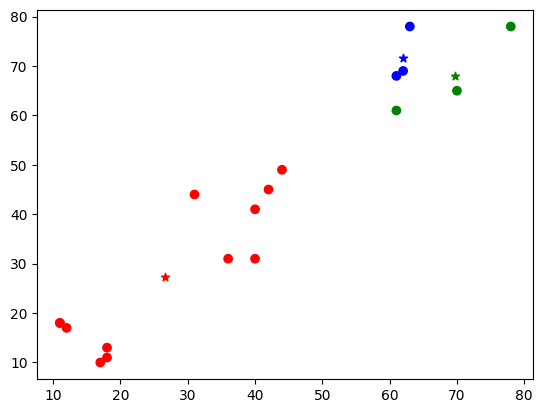

In [12]:
plt.scatter(df['Income'],df['Expenses'],c=df['Label'])

plt.scatter(cent1[0],cent1[1],color = 'r',marker='*')
plt.scatter(cent2[0],cent2[1],color = 'g',marker='*')
plt.scatter(cent3[0],cent3[1],color = 'b',marker='*')

plt.show()

In [13]:
df['r'] = ((X[:,0] - cent1[0])**2 + (X[:,1] - cent1[1])**2)**0.5
df['g'] = ((X[:,0] - cent2[0])**2 + (X[:,1] - cent2[1])**2)**0.5
df['b'] = ((X[:,0] - cent3[0])**2 + (X[:,1] - cent3[1])**2)**0.5

df['Label'] = df.loc[:,'r':'b'].idxmin(axis=1)

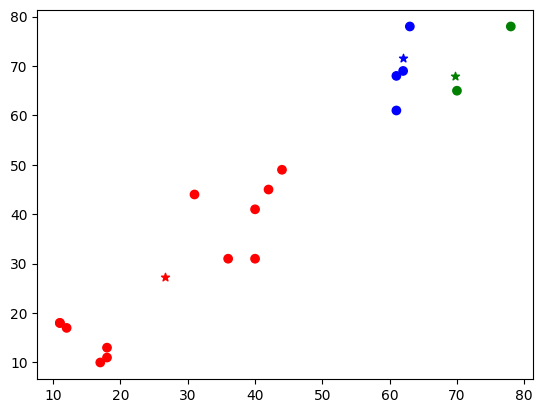

In [14]:
plt.scatter(df['Income'],df['Expenses'],c=df['Label'])

plt.scatter(cent1[0],cent1[1],color = 'r',marker='*')
plt.scatter(cent2[0],cent2[1],color = 'g',marker='*')
plt.scatter(cent3[0],cent3[1],color = 'b',marker='*')

plt.show()

In [15]:
cent1 = list(df[df['Label'] == 'r'][['Income','Expenses']].mean())
cent2 = list(df[df['Label'] == 'g'][['Income','Expenses']].mean())
cent3 = list(df[df['Label'] == 'b'][['Income','Expenses']].mean())

print(cent1 , cent2 , cent3)

[26.666666666666668, 27.333333333333332] [74.0, 71.5] [61.75, 69.0]


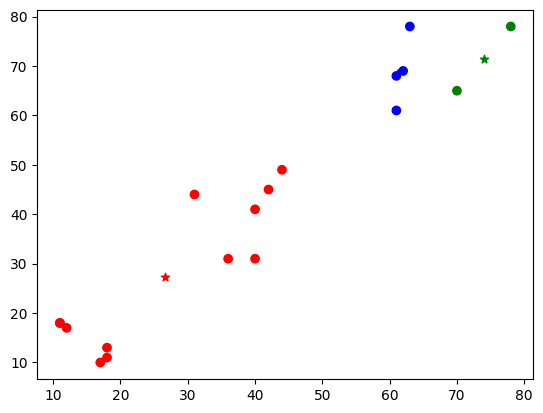

In [16]:
plt.scatter(df['Income'],df['Expenses'],c=df['Label'])

plt.scatter(cent1[0],cent1[1],color = 'r',marker='*')
plt.scatter(cent2[0],cent2[1],color = 'g',marker='*')
plt.scatter(cent3[0],cent3[1],color = 'b',marker='*')

plt.show()

In [17]:
df_labeled = df[['Income','Expenses','Label']]
df_labeled

,Income,Expenses,Label
0,11,18,r
1,17,10,r
2,31,44,r
3,40,31,r
4,61,68,b
5,78,78,g
6,40,41,r
7,62,69,b
8,42,45,r
9,70,65,g


In [18]:
#income and Expenses are in middle range
df_labeled[df_labeled['Label'] == 'b']

,Income,Expenses,Label
4,61,68,b
7,62,69,b
10,61,61,b
12,63,78,b


In [19]:
df = pd.DataFrame(X , columns = ['Income','Expenses'])
df

,Income,Expenses
0,11,18
1,17,10
2,31,44
3,40,31
4,61,68
5,78,78
6,40,41
7,62,69
8,42,45
9,70,65


In [20]:
from sklearn.cluster import KMeans

model1 = KMeans(n_clusters=3)

model1.fit(df)

KMeans(n_clusters=3)

In [21]:
#[69.0, 62.666666666666664] [15.5, 14.666666666666666] [41.166666666666664, 38.166666666666664]

print(model1.cluster_centers_)

[[14.5        14.5       ]
 [65.83333333 69.83333333]
 [38.83333333 40.16666667]]


In [22]:
df['Labels'] = model1.predict(df)

In [23]:
df.head()

,Income,Expenses,Labels
0,11,18,0
1,17,10,0
2,31,44,2
3,40,31,2
4,61,68,1


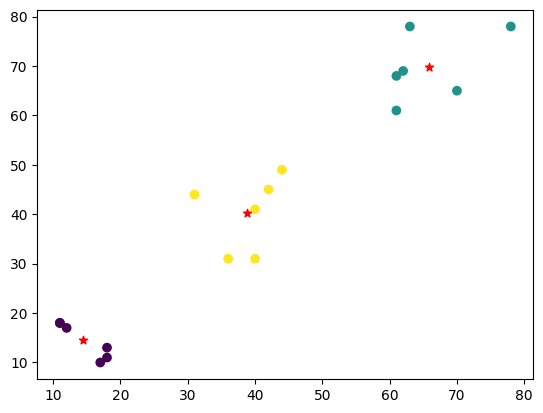

In [24]:
plt.scatter(df['Income'], df['Expenses'], c=df['Labels'])

plt.scatter(model1.cluster_centers_[:,0], model1.cluster_centers_[:,1], color = 'r', marker='*')

plt.show()


**Knee Rule or Elbow Method**

*to decide number of clusters*


In [25]:
df = pd.DataFrame(X , columns = ['Income','Expenses'])
df


,Income,Expenses
0,11,18
1,17,10
2,31,44
3,40,31
4,61,68
5,78,78
6,40,41
7,62,69
8,42,45
9,70,65


In [26]:
losses = []

for i in range(1,10):
  model2 = KMeans(n_clusters=i)
  model2.fit(df)
  losses.append(model2.inertia_)

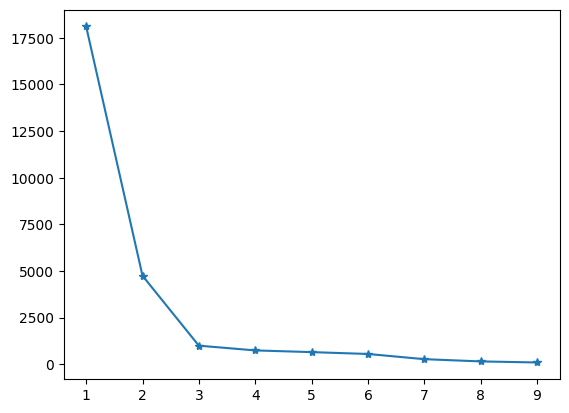

In [27]:
plt.plot(range(1,10),losses,marker='*')
plt.show()